# Python Miniproject

---



### > Analysis of Universities in the US

> The aim of this project is to find out which are the most relevant features that students consider to choose the preferred American university. Some of the essential questions for developing this project are related to the number of applications, admissions, and enrollments, cost of tuition and fees, cost of living on campus, types of degrees offered, and features of the states where universities are located (population and GDP).





### Let's begin

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('C:/Users/satva/root/College/2nd Year/3rd Sem/Assignments/IPEDS_data.xlsx')

In [4]:
df.shape

(1534, 145)

### Cleaning the dataset: For drawing accurate analysis from any dataset,cleaning is a crutial task. This involves removing or replacing null values & deleting duplicate entries.

(array([104.,  10.,  13.,   6.,   0.,   1.,   8.,   0.,   2.,   1.]),
 array([   0. ,  101.8,  203.6,  305.4,  407.2,  509. ,  610.8,  712.6,
         814.4,  916.2, 1018. ]),
 <BarContainer object of 10 artists>)

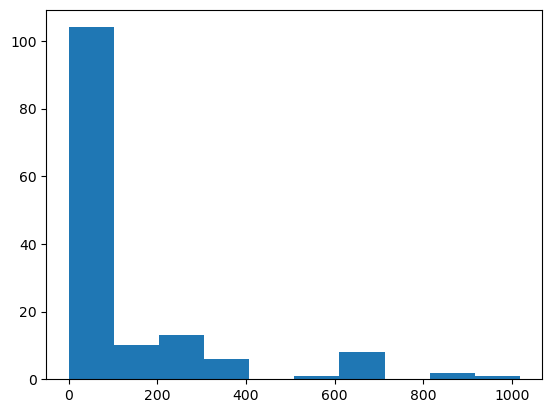

In [5]:
plt.hist(df.isna().sum())

### Columns which have null values more than 20% are dropped for the ease of analysis.

In [6]:
removecolumns=df.isnull().sum()[df.isnull().sum()/len(df)>0.2]

In [7]:
remove=removecolumns.index.to_list()

In [8]:
df.drop(remove,axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 127 entries, ID number to Percent of freshmen receiving other loan aid
dtypes: float64(98), int64(2), object(27)
memory usage: 1.5+ MB


In [10]:
df.columns

Index(['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered',
       'County name', 'Longitude location of institution',
       'Latitude location of institution', 'Religious affiliation',
       'Offers Less than one year certificate',
       ...
       'Percent of freshmen receiving any financial aid',
       'Percent of freshmen receiving federal, state, local or institutional grant aid',
       'Percent of freshmen  receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid'],
      dtype='object', length=127)

In [11]:
df.describe()

,ID number,year,Longitude location of institution,Latitude location of institution,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,"Estimated enrollment, total",...,Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid
count,1534.000000,1534.0,1534.000000,1534.000000,1377.000000,1377.000000,1377.000000,1257.000000,1259.000000,1532.000000,...,1492.000000,1492.000000,1492.00000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000
mean,189091.037810,2013.0,-88.342338,38.729993,6391.193174,3554.880174,1043.046478,53.927605,53.085782,7033.115535,...,90.672252,84.464477,41.47185,40.764075,15.418901,35.384718,70.335121,64.959786,64.180295,7.553619
std,58641.915456,0.0,14.838804,4.832832,8787.469171,4309.457606,1285.165519,34.385164,31.658662,9387.648898,...,11.963692,17.304491,18.88068,18.560557,14.091423,21.897744,29.463324,19.143070,19.337354,7.706674
min,100654.000000,2013.0,-158.062444,19.701854,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,...,18.000000,10.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,153148.500000,2013.0,-94.576341,35.348340,1488.000000,950.000000,287.000000,16.000000,26.000000,1497.250000,...,87.000000,73.000000,28.00000,27.000000,6.000000,18.000000,48.000000,54.000000,53.000000,2.000000
50%,186508.000000,2013.0,-84.514218,39.946096,3350.000000,2056.000000,538.000000,65.000000,49.000000,3126.000000,...,95.000000,92.000000,40.00000,39.000000,12.000000,34.000000,78.000000,68.000000,67.000000,6.000000
75%,215730.000000,2013.0,-77.207136,41.984929,7016.000000,4203.000000,1246.000000,86.000000,87.000000,8376.000000,...,99.000000,99.000000,51.25000,51.000000,20.250000,50.000000,98.000000,79.000000,78.000000,11.000000
max,456490.000000,2013.0,-67.456534,64.857053,72676.000000,35815.000000,10241.000000,100.000000,100.000000,79576.000000,...,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000


### Identifying outliers:

> A university cannot have 0 applications, admissions & enrollments in a year.Identifying any such university as an outlier & dropping that particular row is a pre-requisite step for EDA.



In [12]:
df[(df['Applicants total']==0)|(df['Admissions total']==0)|(df['Enrolled total']==0)]

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid
99,115083,Golden Gate University-San Francisco,2013,94105-2968,Doctor's degree - research/scholarship and pro...,San Francisco County,-122.398785,37.789208,Not applicable,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
invalid=df[df['Name']=='Golden Gate University-San Francisco'].index

In [14]:
df.drop(invalid,axis=0,inplace=True)

In [15]:
df['acceptance rate']=df['Admissions total']/df['Applicants total']

In [16]:
df['enrollmentacceptanceratio']=df['Enrolled total']/df['Admissions total']

# Let's figure out the most popular universities across US in terms of total applications received.

In [17]:
df1=df[['Name','Admissions total','enrollmentacceptanceratio','State abbreviation','acceptance rate','Applicants total','Tuition and fees, 2013-14']].sort_values('Applicants total',ascending=False).head(20)

In [18]:
dfnew=df.sort_values('Applicants total',ascending=False).head(20)

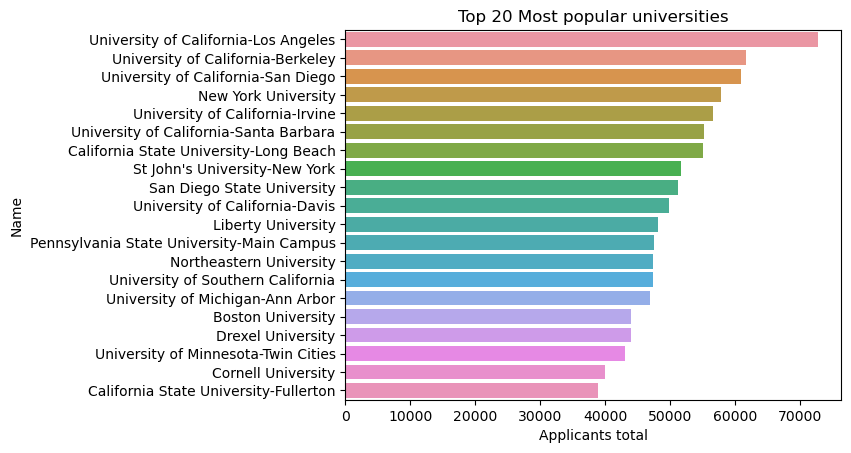

<Figure size 3000x3000 with 0 Axes>

In [19]:
sns.barplot(y='Name',x='Applicants total',data=df1)
plt.title('Top 20 Most popular universities')
plt.figure(figsize=(30,30))
plt.show()

Observation:A barplot of top 20 universities in terms of number of applicants is obtained. UCLA is the most preferred university receiving more than 700000 applications in the year 2013.

### Q)Do the students applying in popular universities across US actually get enrolled there?

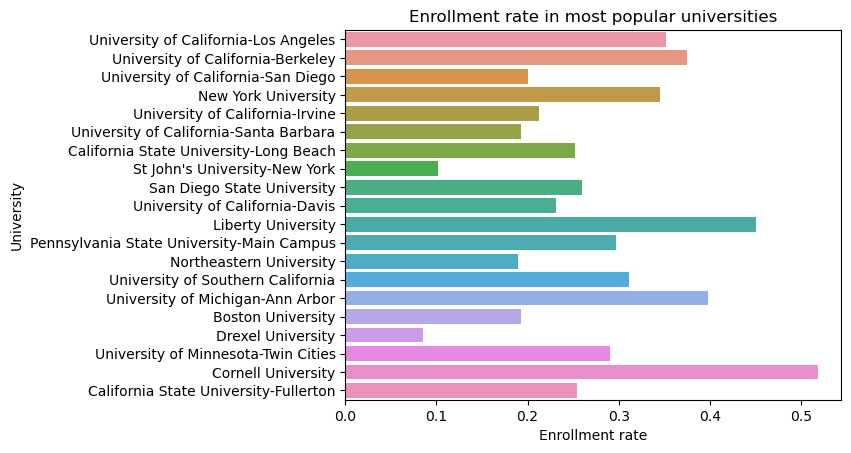

In [20]:
sns.barplot(y='Name',x='enrollmentacceptanceratio',data=df1)
plt.title('Enrollment rate in most popular universities')
plt.xlabel('Enrollment rate')
plt.ylabel('University')
plt.show()

Observation: The analysis states that the most popular universities have an enrollment rate ranging from less than 10% to 50%. UCLA which was the most preferred among the students has an enrollment rate of 35%. Cornell university has an acceptance rate of more than 50% which is the highest in the US.

### Q) How are the acceptance rates in popular universities across US?

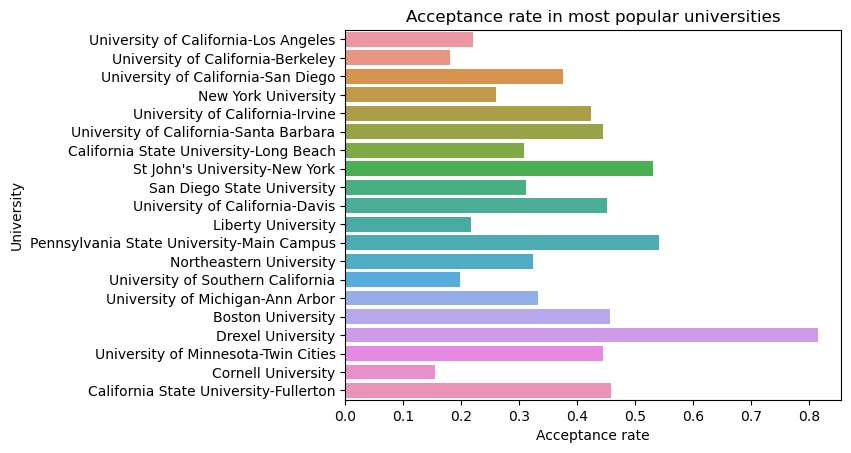

In [21]:
sns.barplot(y='Name',x='acceptance rate',data=df1)
plt.title('Acceptance rate in most popular universities')
plt.xlabel('Acceptance rate')
plt.ylabel('University')
plt.show()

Observation: Cornell University has the lowest acceptance rate of 15%. Drexel University has an overwhelmingly high acceptance rate of 80%. Although in the previous analysis it was inferred that Drexel University has a very low enrollment rate of 10%. This means that most of the students getting admission in Drexel University prefer not to go there.

In [22]:
df2=df[['enrollmentacceptanceratio','State abbreviation']].sort_values('enrollmentacceptanceratio',ascending=False)

## Q) Which states receive the highest amount of enrollments?

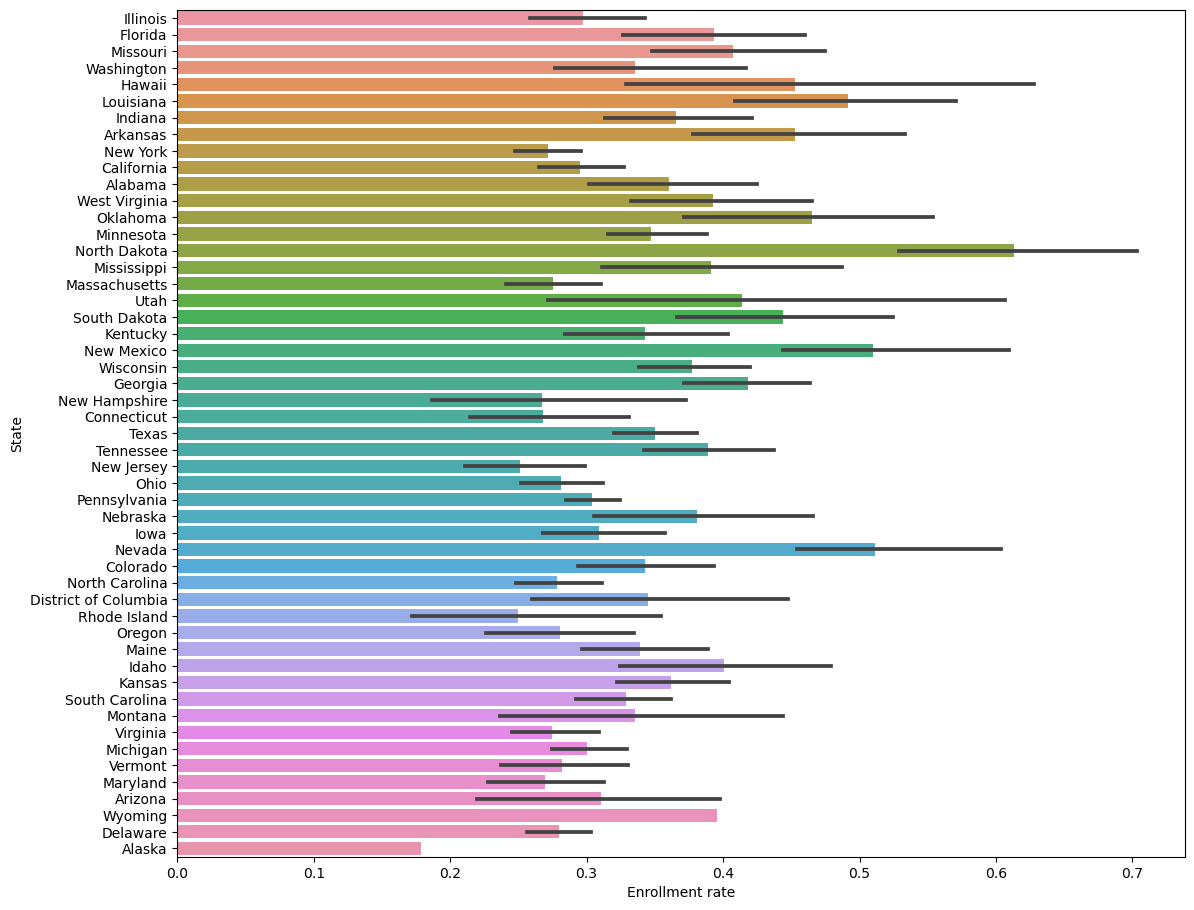

In [23]:
plt.figure(figsize=(13,11))
sns.barplot(y='State abbreviation',x='enrollmentacceptanceratio',data=df2)
plt.xlabel('Enrollment rate')
plt.ylabel('State')
plt.show()

Observation: Since there is a high variability in the enrollment rates, we cannot certainly conclude which state has the maximum enrollment rate.However,it can be observed that most of the universities have an enrollment rate of 30% & above. Alaska has a comparitively lower enrollment rate of 18% which may be due to it's cold climate.

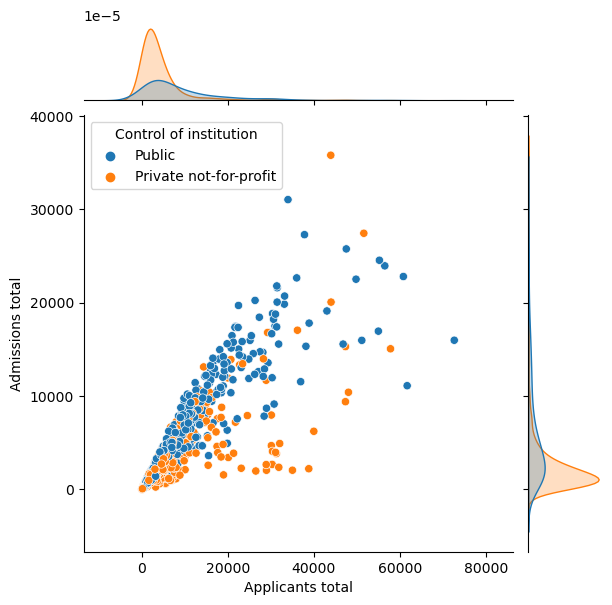

In [24]:
sns.jointplot(data=df,x='Applicants total',y='Admissions total',hue='Control of institution')

Observation: Barring a few universities, we can observe that generally those universities which receive a lot of applications also have a large number of admissions both in case of public & private universities. Most of the universities admit less than 20,000 candidates every year.

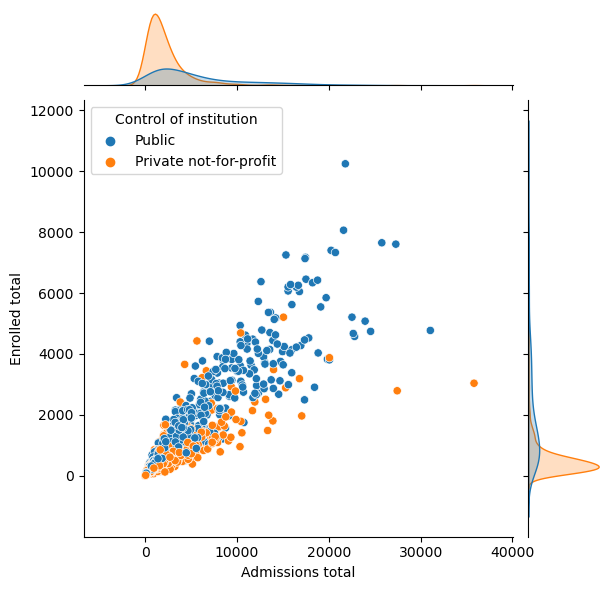

In [25]:
sns.jointplot(data=df,x='Admissions total',y='Enrolled total',hue='Control of institution')

Observation: It can be concluded that a comparitively larger number of students get enrolled in Public universities rather than private universities. Barring a few private universities, in most of the universities the students getting admission get also get enrolled.

Text(463.154761904762, 0.5, 'Acceptance rate')

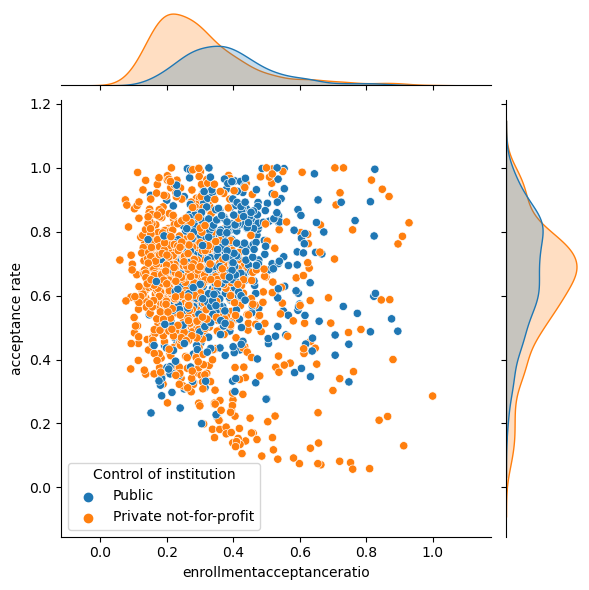

In [26]:
sns.jointplot(y='acceptance rate',x='enrollmentacceptanceratio',hue='Control of institution',data=df)
plt.xlabel('Enrollment rate')
plt.ylabel('Acceptance rate')

Ovservation:Universities with a very low acceptance rate of less than 20%  are those which have maximum enrollments every year.This means that students getting admission in these universities certainly get enrolled.

Text(0.5, 1.0, 'Average total applications & variation in applications')

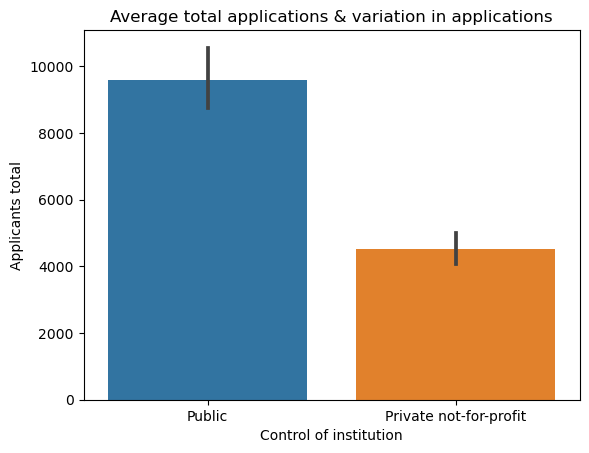

In [27]:
sns.barplot(x='Control of institution',y='Applicants total',data=df)
plt.title('Average total applications & variation in applications')

Observation: Public universities receive more number of applications every year.This may be due to the affordability in terms of tuition fees, cost of living

# Tuition fees across universities in US

### Note that here sns.barplot is used to find the average number of applicants.
Since the number of private universities is much more than the number of public universities, a comparison in terms of total number of applicants cannot be drawn.Hence, countplot cannot be used.

In [28]:
df5=df[df['Control of institution']=='Public']

In [29]:
df6=df[df['Control of institution']=='Private not-for-profit']

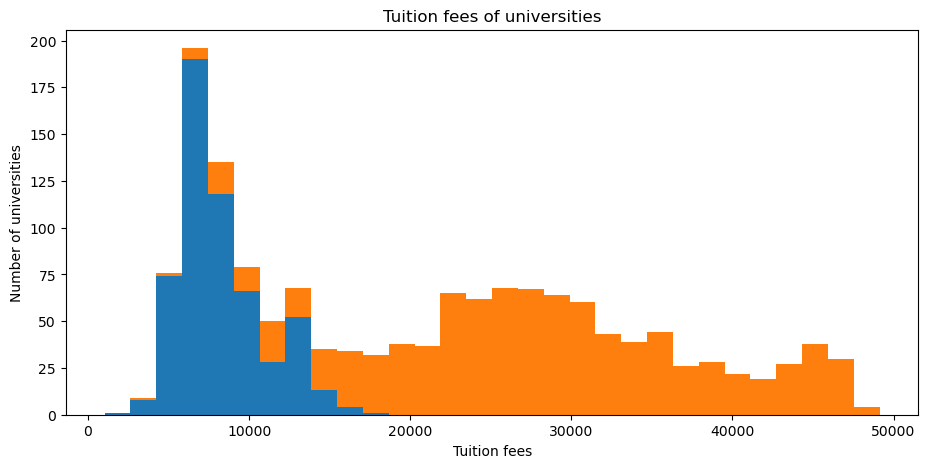

In [30]:
plt.figure(figsize=(11,5))
plt.hist([df5['Tuition and fees, 2013-14'],df6['Tuition and fees, 2013-14']], stacked=True,bins=30)
plt.xlabel('Tuition fees')
plt.title('Tuition fees of universities')
plt.ylabel('Number of universities')
plt.show()

Observation: All public universities have tuition fees lesser than 20,000 whereas the fee structure of private university is as high as 50,000.

### Q) Do students prefer universities with low or high tuition fees?

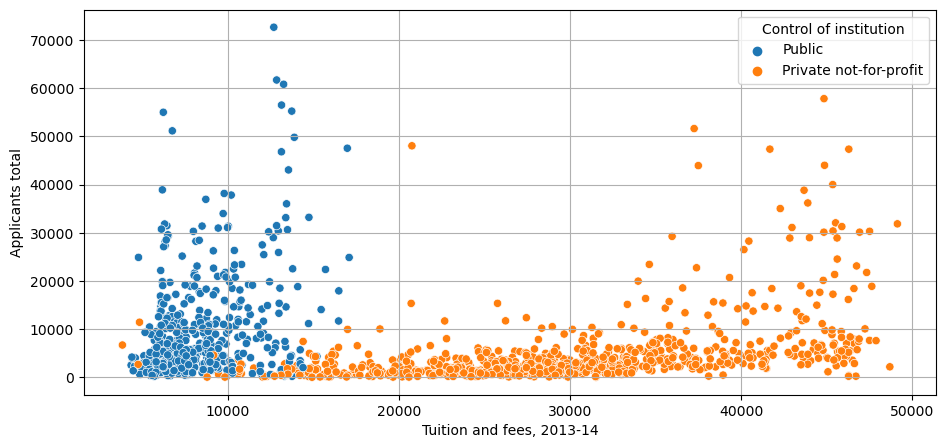

In [31]:
plt.figure(figsize=(11,5))
sns.scatterplot(y='Applicants total',x='Tuition and fees, 2013-14',data=df,hue='Control of institution')
plt.grid()

Observation:Barring a few private universities, the universities where the tuition fees high receive lesser number of applications every year. Private universities have a much higher tuition fees than public universities.

### Let's take a look at the average fees in the most popular states.

In [32]:
df8=df['State abbreviation'].value_counts().head(10)

In [33]:
popularstates=df8.index

In [34]:
df9=df[df['State abbreviation'].isin(popularstates)]

<AxesSubplot:xlabel='State abbreviation', ylabel='Tuition and fees, 2013-14'>

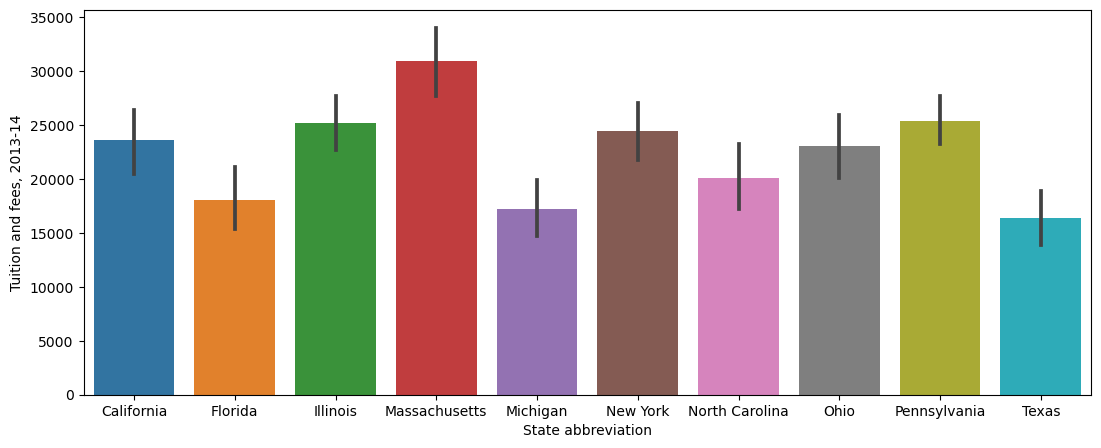

In [35]:
plt.figure(figsize=(13,5))
sns.barplot(x='State abbreviation',y='Tuition and fees, 2013-14',data=df9)

Observation: Those cities receiving a large number of applications have average fees ranging from 15,000 to 30,000 with a comparitively lower variability.

##Average fees in most popular states depending upon the type of institution.

Text(0.5, 1.0, 'Tuition fees of universities')

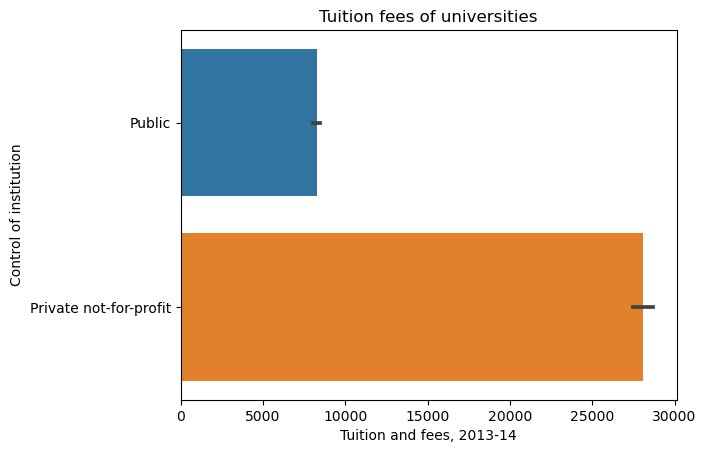

In [36]:
sns.barplot(x='Tuition and fees, 2013-14',y='Control of institution',data=df)
plt.title('Tuition fees of universities')

Observation: Average fees in public universities is lesser than 10000 whereas in private colleges it is as high as 30000. Private universities are 3x more expensive than public universities, this is the reason why less students prefer to seek admission in private universities.

<AxesSubplot:xlabel='State abbreviation', ylabel='Tuition and fees, 2013-14'>

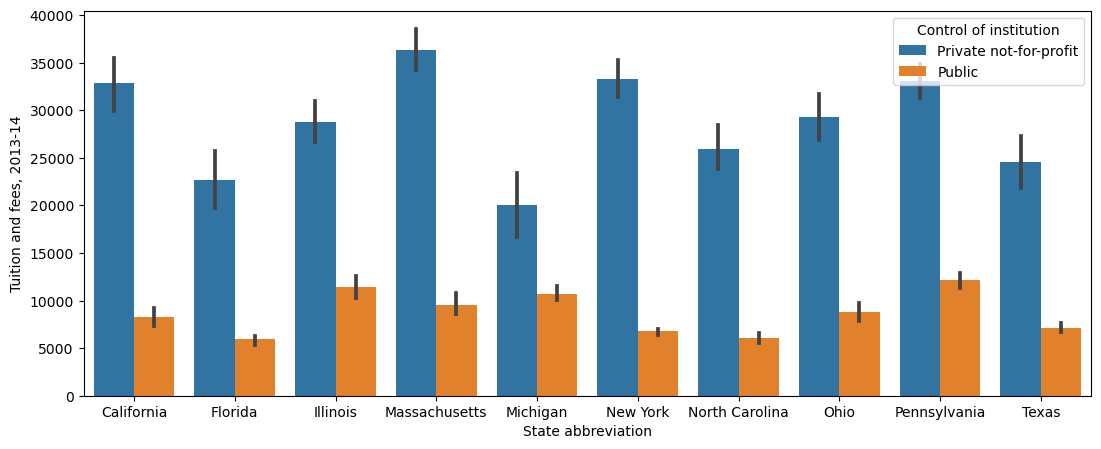

In [37]:
plt.figure(figsize=(13,5))
sns.barplot(x='State abbreviation',y='Tuition and fees, 2013-14',data=df9,hue='Control of institution')

Observation: State-wise tuition fees in private universites in most popular states ranges from more than 20,000 to more than 35,000 whereas in public universities the tuition fees is less than 15000.

### Q)Does the tuition fees vary for in-state & out-of-state students?

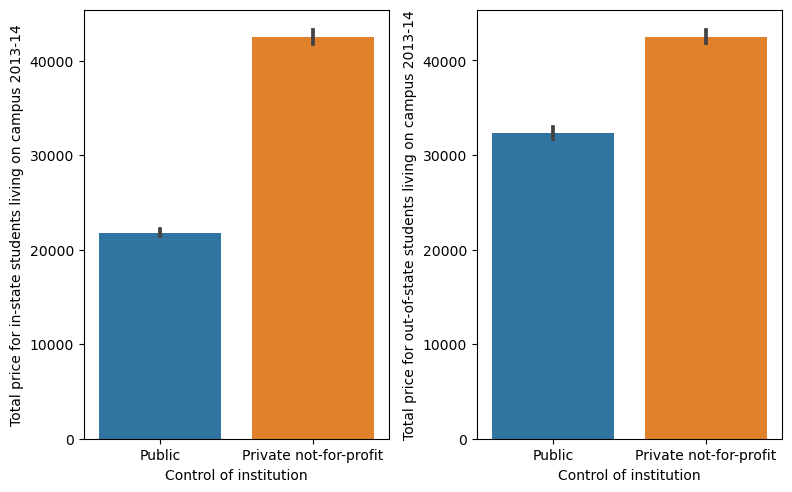

In [38]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.barplot(x='Control of institution',y='Total price for in-state students living on campus 2013-14',data=df)
plt.subplot(1,2,2)
sns.barplot(x='Control of institution',y='Total price for out-of-state students living on campus 2013-14',data=df)
plt.tight_layout(pad=1)

Observation: Tuition fees is similar for in-state & out-of-state students in private universities.However, the tuition fees is higher for out-of-state students in public universities.

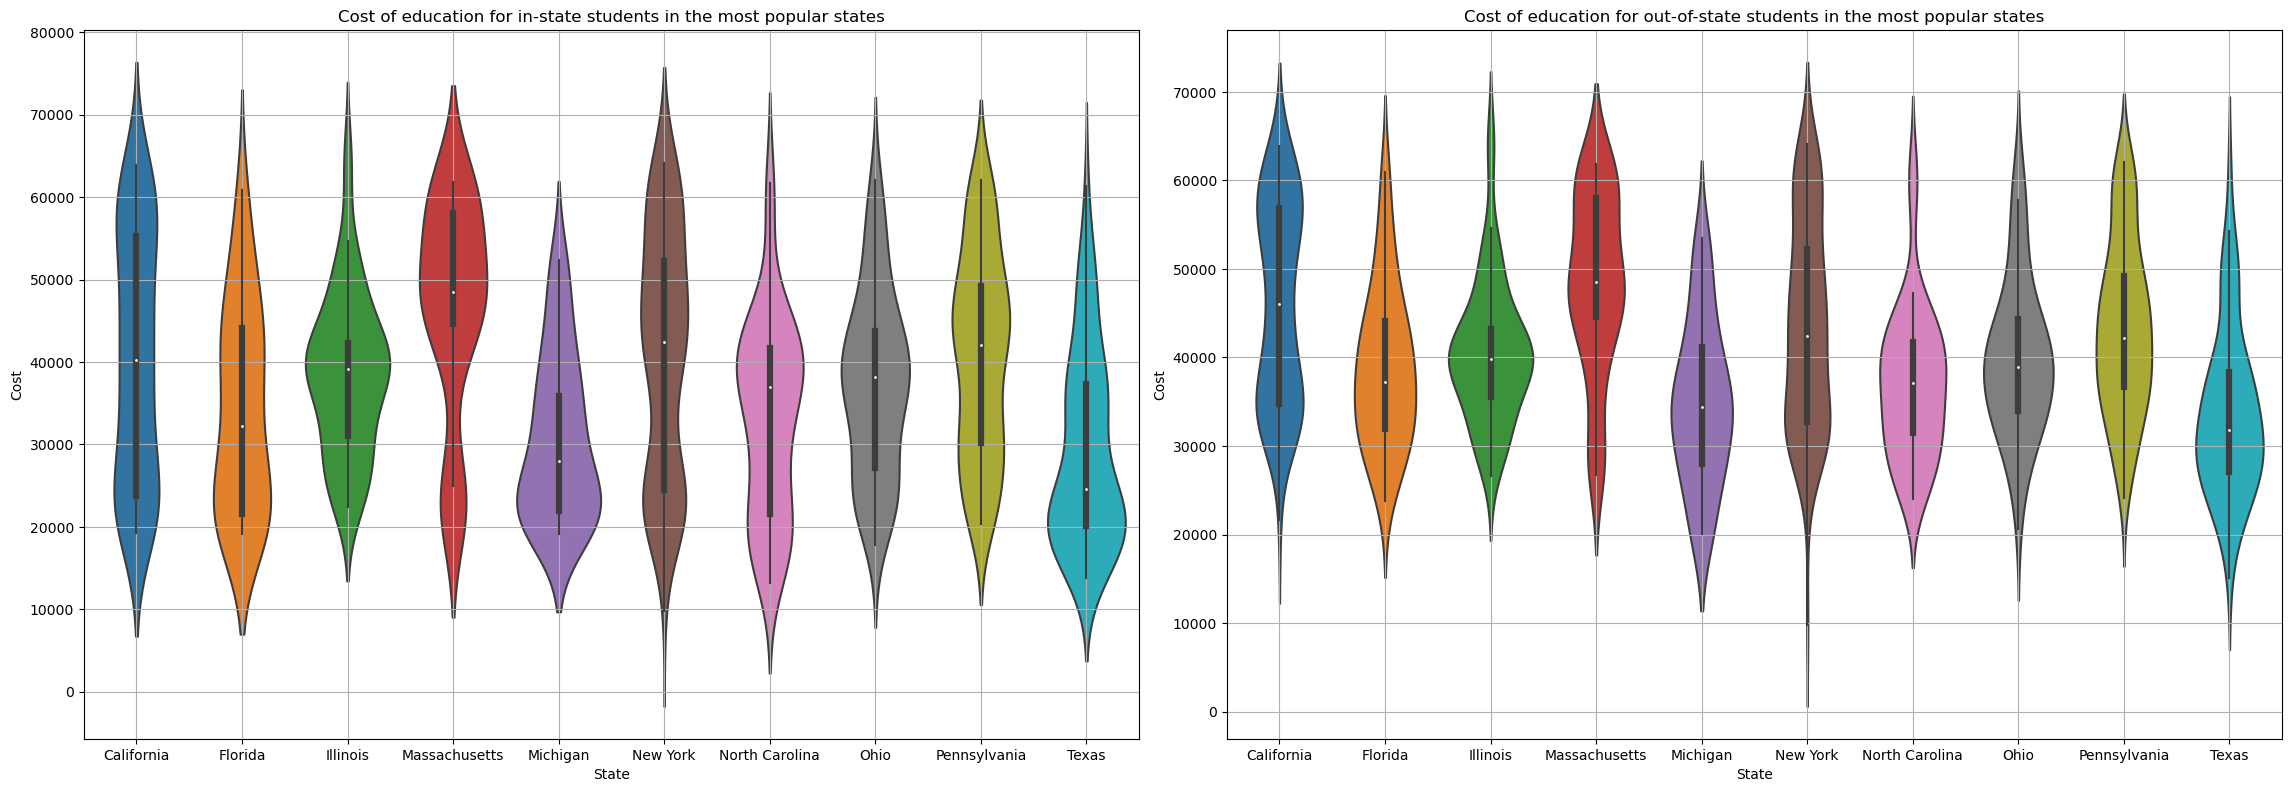

In [39]:
plt.figure(figsize=(23,8))
plt.subplot(1,2,1)
sns.violinplot(x='State abbreviation',y='Total price for in-state students living on campus 2013-14',data=df9)
plt.title('Cost of education for in-state students in the most popular states')
plt.xlabel('State')
plt.ylabel('Cost')
plt.grid()
plt.subplot(1,2,2)
sns.violinplot(x='State abbreviation',y='Total price for out-of-state students living on campus 2013-14',data=df9)
plt.title('Cost of education for out-of-state students in the most popular states')
plt.xlabel('State')
plt.ylabel('Cost')
plt.tight_layout(pad=1)
plt.grid()

Observation: The range of tuition fees is shown for the most popular states for both in-state & out-of-state students & the distribution of students is also evident using a violin plot.

Text(0, 0.5, 'Cost')

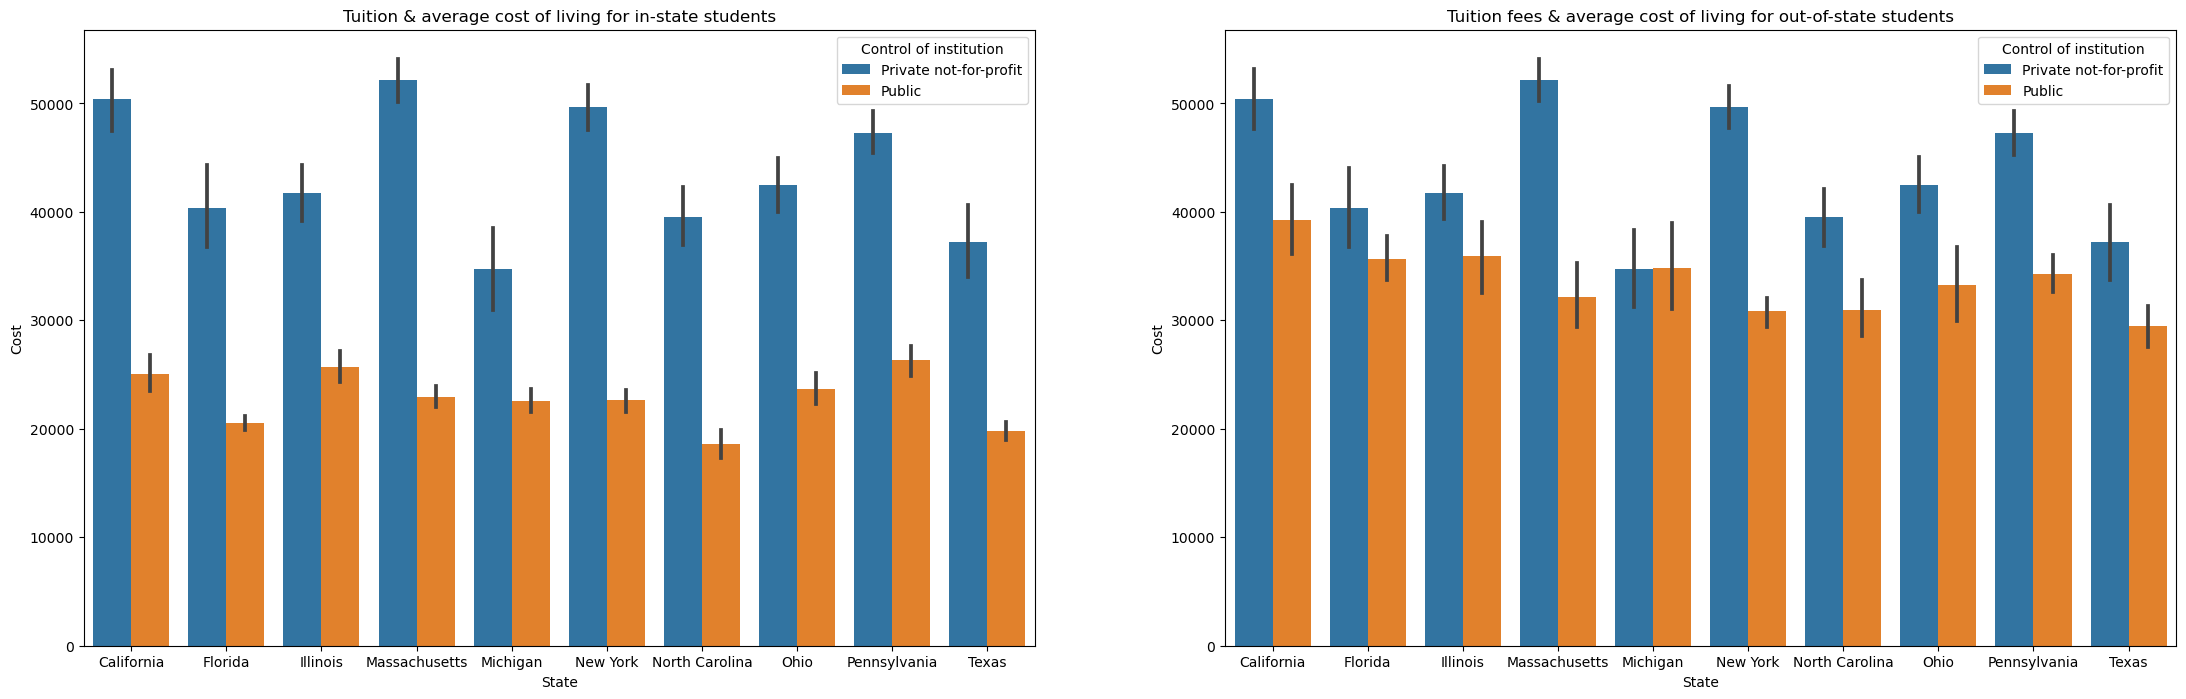

In [40]:
plt.figure(figsize=(27,8))
plt.subplot(1,2,1)
sns.barplot(x='State abbreviation',y='Total price for in-state students living on campus 2013-14',hue='Control of institution',data=df9)
plt.xlabel('State')
plt.ylabel('Cost')
plt.title('Tuition & average cost of living for in-state students')
plt.subplot(1,2,2)
sns.barplot(x='State abbreviation',y='Total price for out-of-state students living on campus 2013-14',hue='Control of institution',data=df9)
plt.title('Tuition fees & average cost of living for out-of-state students')
plt.xlabel('State')
plt.ylabel('Cost')

Observation: The average cost of education for both in-state & out-of-state students is comparable in private as well as public universities in the states which prefer the most.In case of public universities, California is the most expensive state for education for out-of-state students & Texas is the most affordable one.The tuition fees ranges from 30,000 to 40,000.For in-state students the tuition fees ranges from 20,000 to 25,000 with a slight variability.

### Q) Do students prefer lower or higher cost of living on Campus ?

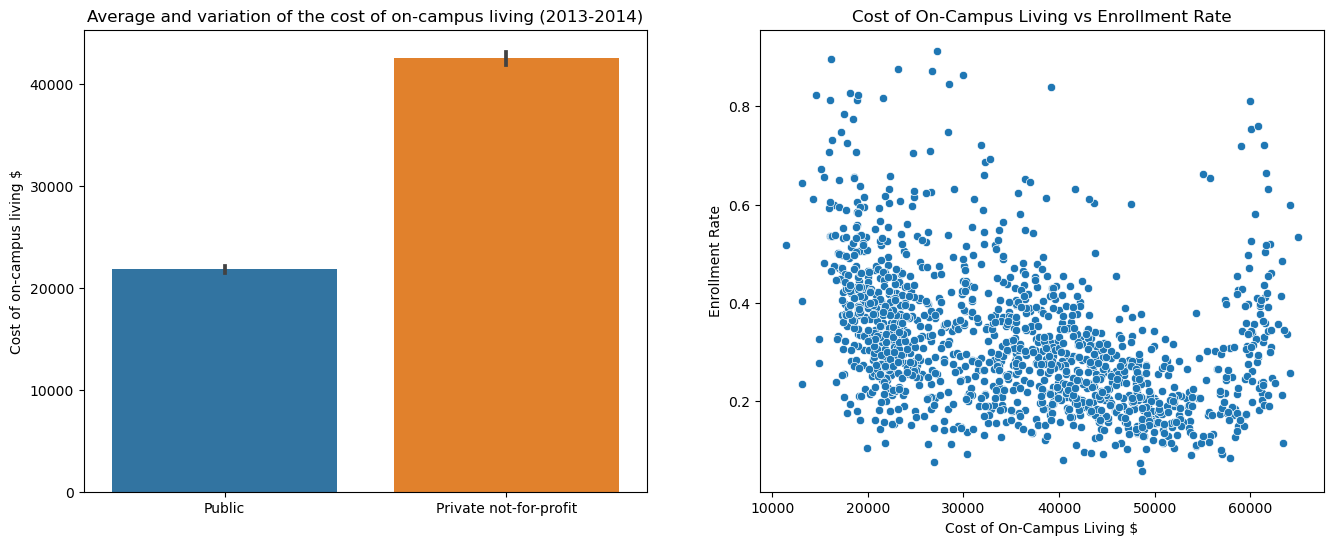

In [41]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(x='Control of institution',y='Total price for in-state students living on campus 2013-14',data=df);
plt.title('Average and variation of the cost of on-campus living (2013-2014)')
plt.xlabel('')
plt.ylabel('Cost of on-campus living $')

plt.subplot(1,2,2)
sns.scatterplot(x='Total price for in-state students living on campus 2013-14',y='enrollmentacceptanceratio', data=df)
plt.title('Cost of On-Campus Living vs Enrollment Rate')
plt.xlabel('Cost of On-Campus Living $')
plt.ylabel('Enrollment Rate');

Observations: Cost of on-campus living is higher for Private Universities compared to Public Universities. <br />
Students are enrolled in higher density where Cost of living is lesser

<AxesSubplot:xlabel='Total price for in-state students living on campus 2013-14', ylabel='State abbreviation'>

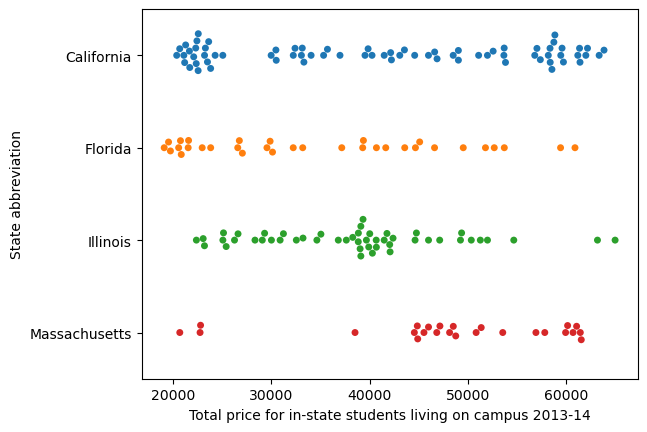

In [42]:
sns.swarmplot(x='Total price for in-state students living on campus 2013-14', y='State abbreviation', data=df9.head(200))

Observations: State wise comparisions of cost shows almost uniform distribution

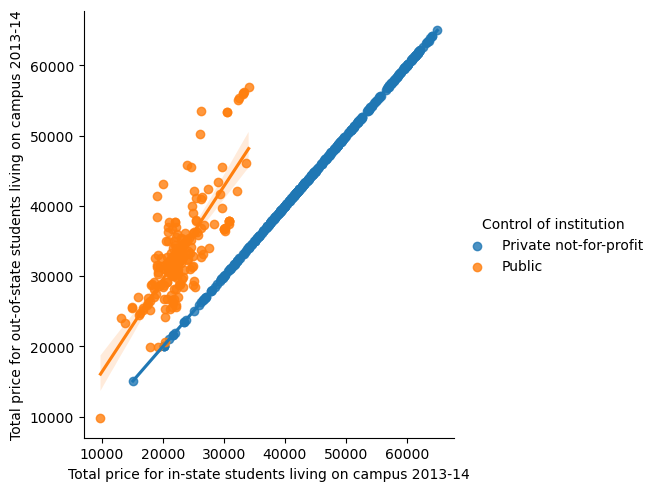

In [43]:
sns.lmplot(data=df9, x='Total price for in-state students living on campus 2013-14', y='Total price for out-of-state students living on campus 2013-14', hue='Control of institution')

Observations: Differences in Cost for In State and Out of State students shows that it is equivalent for Private Universities while The Tution in Public Universities is lesser for In State Students and is Higher for Out Of State Students

### Q) Which level of education offered by universities do students prefer ?

In [45]:
df10=df['Highest degree offered'].value_counts()

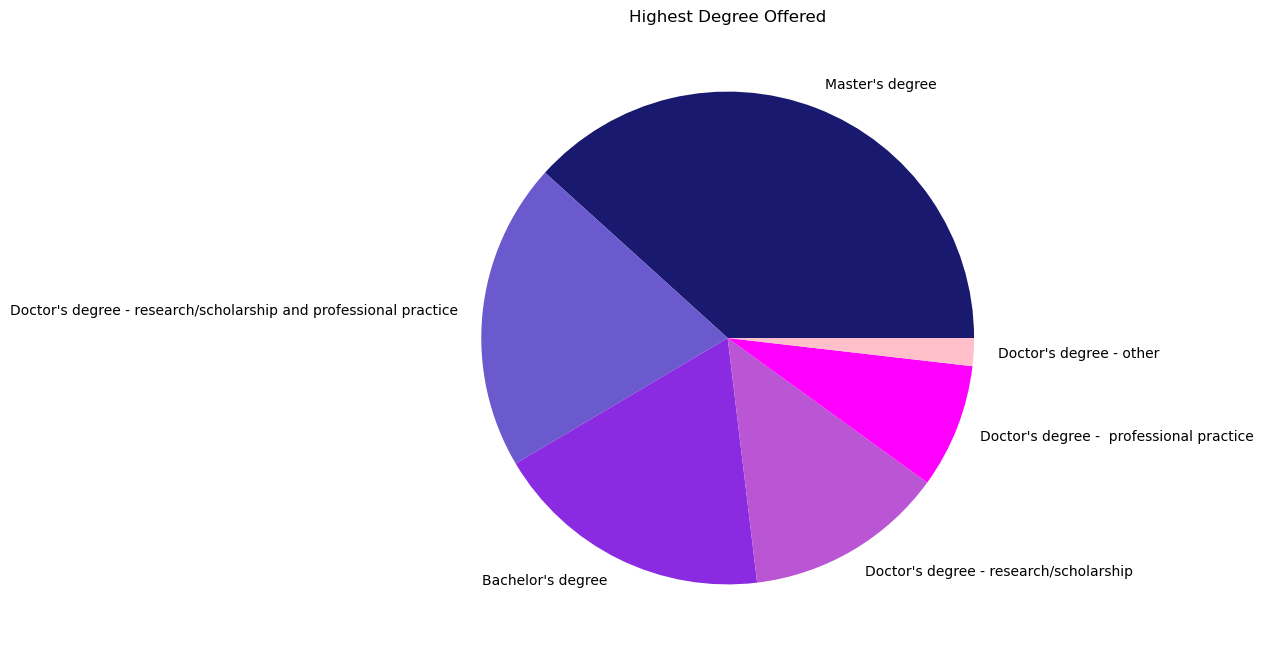

In [46]:
plt.figure(figsize=(16,8))
plt.pie(df10,labels=df10.index,colors = ['midnightblue','slateblue','blueviolet','mediumorchid','fuchsia','pink'])
plt.title('Highest Degree Offered');

Observations: Majority of Universities offer Master's degree with Doctor's degree including proffesional practice being second highest

<AxesSubplot:xlabel='Enrolled total', ylabel='Highest degree offered'>

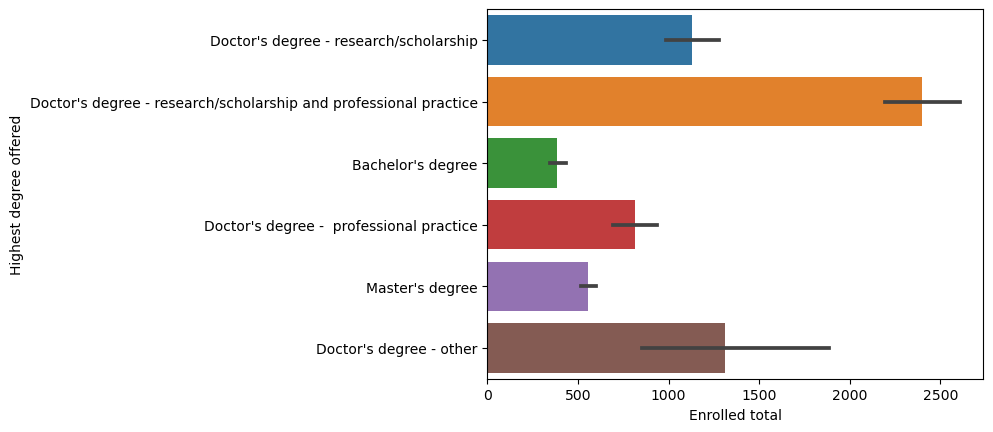

In [47]:
sns.barplot(x='Enrolled total', y='Highest degree offered', data=df )

Observations: Data shows that maximum number of Students are enrolled in Doctor's degree including professional practice with second highest being Other Degrees but that has a high confidence interval so actual values may differ than average 

### Q) Do Students opt for financial aid given by respective State and University

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Alabama A & M University'),
  Text(1, 0, 'University of Alabama at Birmingham'),
  Text(2, 0, 'Amridge University'),
  Text(3, 0, 'University of Alabama in Huntsville'),
  Text(4, 0, 'Alabama State University'),
  Text(5, 0, 'The University of Alabama'),
  Text(6, 0, 'Athens State University'),
  Text(7, 0, 'Auburn University at Montgomery'),
  Text(8, 0, 'Auburn University'),
  Text(9, 0, 'Birmingham Southern College'),
  Text(10, 0, 'Concordia College Alabama'),
  Text(11, 0, 'Faulkner University'),
  Text(12, 0, 'Huntingdon College'),
  Text(13, 0, 'Jacksonville State University'),
  Text(14, 0, 'Judson College'),
  Text(15, 0, 'University of West Alabama'),
  Text(16, 0, 'Miles College'),
  Text(17, 0, 'University of Mobile'),
  Text(18, 0, 'University of Montevallo'),
  Text(19, 0, 'University of North Alabama')])

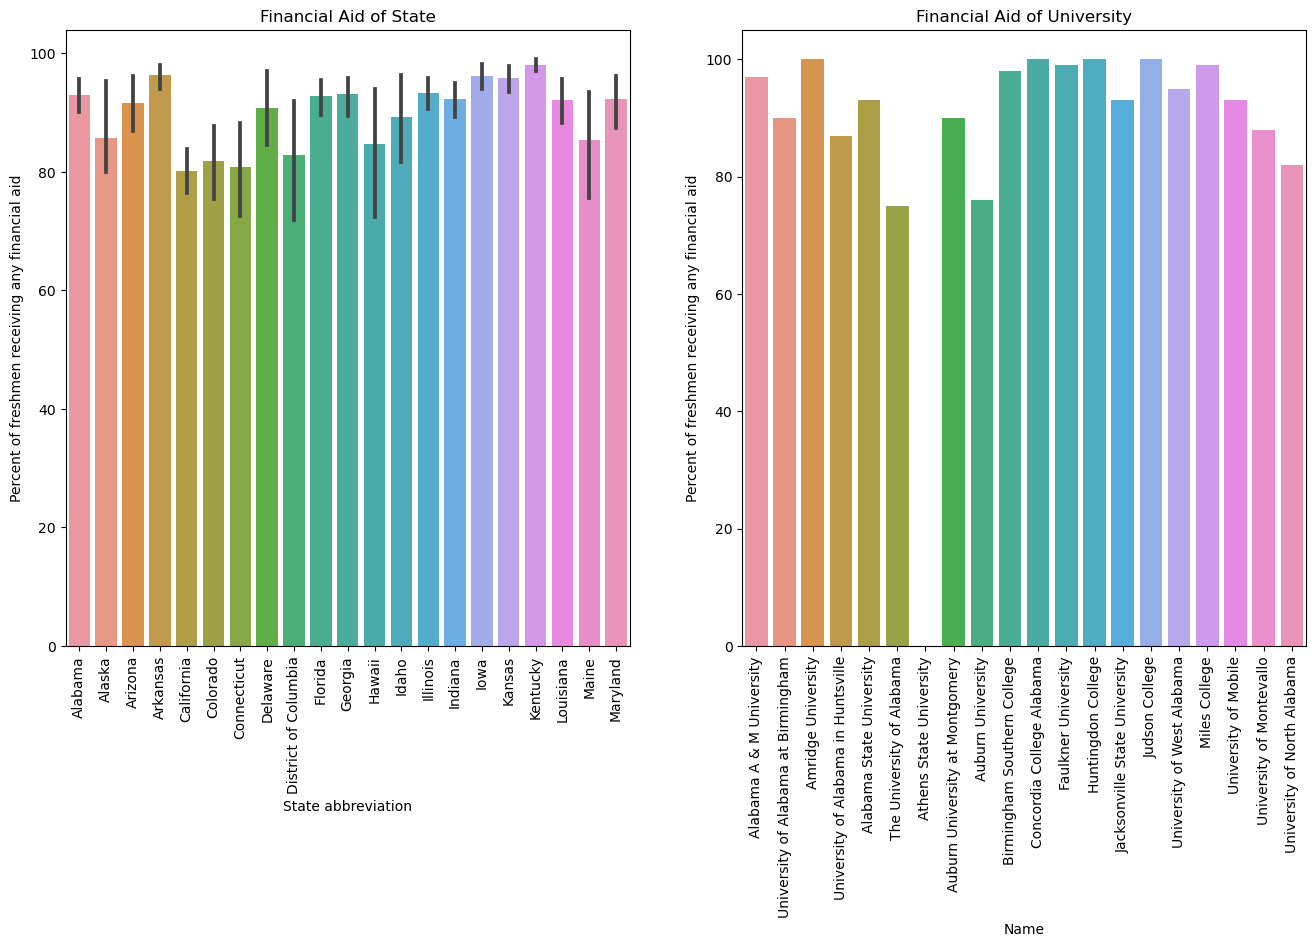

In [48]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Financial Aid of State')
sns.barplot(y='Percent of freshmen receiving any financial aid', x='State abbreviation', data=df.head(500));
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Financial Aid of University')
sns.barplot(y='Percent of freshmen receiving any financial aid', x='Name', data=df.head(20));
plt.xticks(rotation=90)

Observations: Financial Aid given by States is almost equal while Universities are subjective with even zero Aid being given

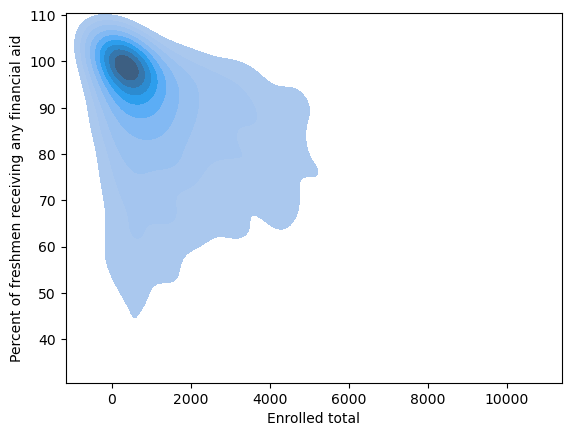

In [49]:
sns.kdeplot(x='Enrolled total', y='Percent of freshmen receiving any financial aid', shade=True, data=df);

Observations: Since vast majority of Students do not get any financial aid it does not affect their decision <br />
The percentage of student receiving aid increases with increase in number of enrollments

### Q) Once enrolled, what type of Enrollment do Students go forward with ?

<AxesSubplot:title={'center':'Part time'}, xlabel='Part-time enrollment', ylabel='Enrolled total'>

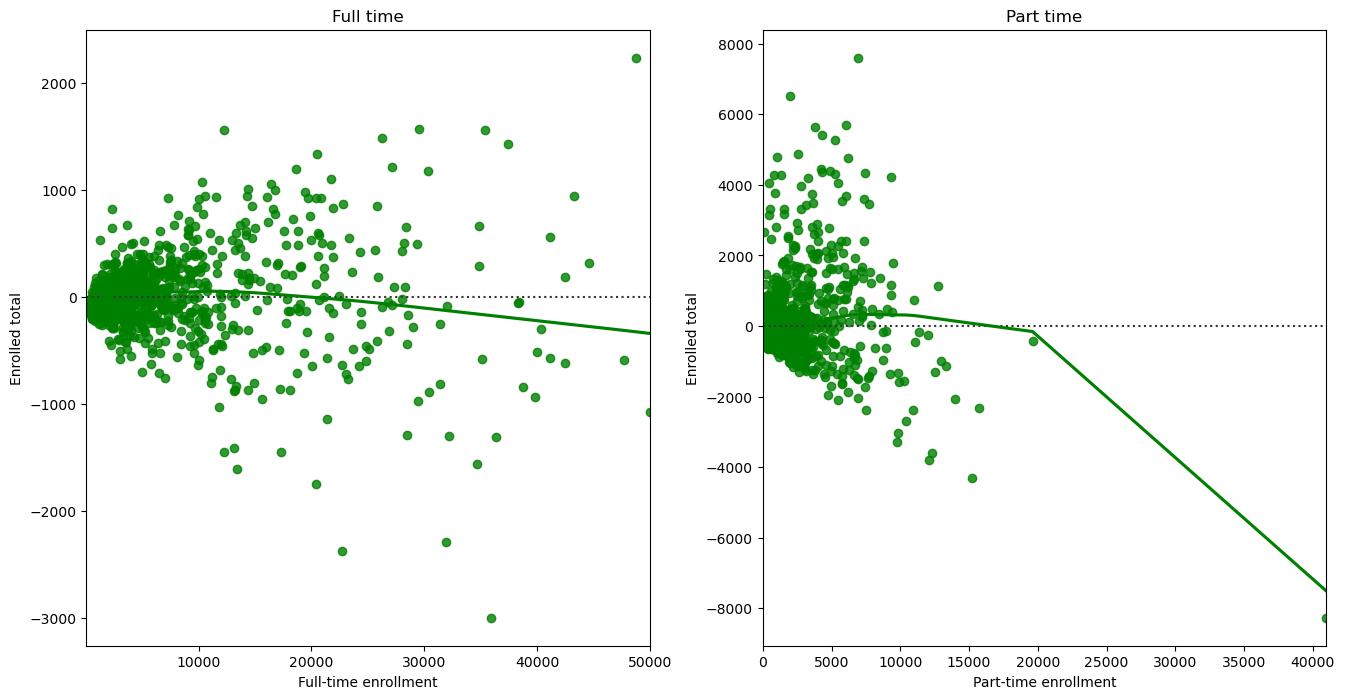

In [52]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Full time')
sns.residplot(x='Full-time enrollment', y='Enrolled total', lowess=True, color="g", data=df)
plt.subplot(1,2,2)
plt.title('Part time')
sns.residplot(x='Part-time enrollment', y='Enrolled total', lowess=True, color="g", data=df)

Observations: There are many students who opt for Full Time Enrollment while almost none of them opt for Part Time Enrollment

<AxesSubplot:xlabel='Full-time enrollment', ylabel='Name'>

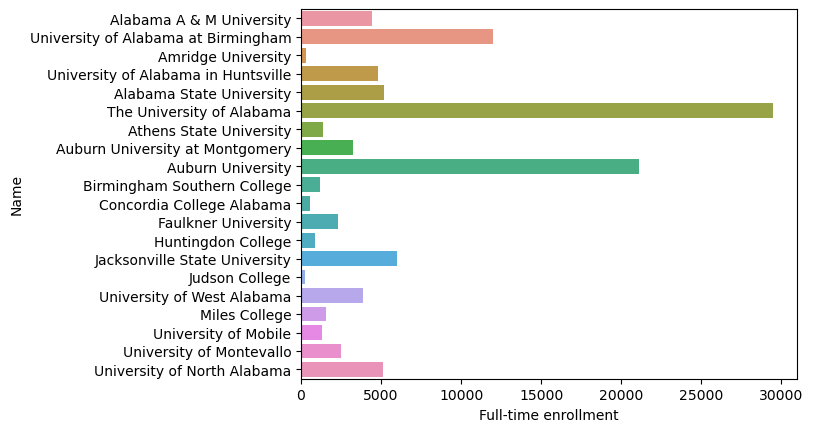

In [53]:
sns.barplot(x='Full-time enrollment', y='Name', data=df.head(20) )

Observations: To aid students in their decision making process, Universites and the number of people Enrolling Full Time are given above 

## Future Scope

<AxesSubplot:xlabel='Admissions total', ylabel='Applicants total'>

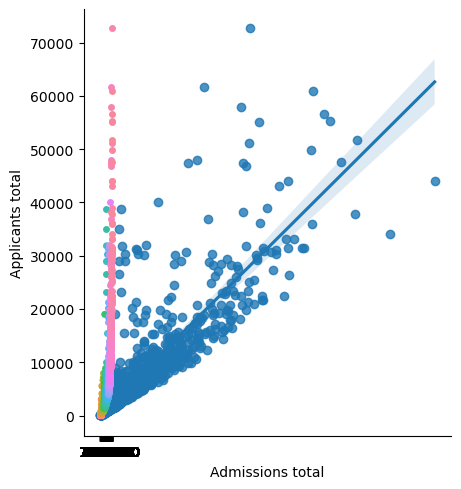

In [55]:
sns.catplot(data=df, y="Applicants total", x="Admissions total")
sns.regplot(data=df, y="Applicants total", x="Admissions total")

Use Machine Learning Model with Regression to classify and predict students preffered University

## Conclusion

Observations: After performing detailed analysis on the Dataset, we can summarize the process as - <br />
-Cleaning data set by removing Null values and removing Outliers <br />
Exploratory Data Analysis <br />
-Analysis is made to identify top 20 most popular Universities in terms of Total Applications <br />
-Comparision is made in terms of Application rate, Acceptance rate and Enrollment rate <br />
-State wise distribution of the above features is done to compare both Private and Public Universities <br />
-Comparision is drawn between In State and Out State Students in terms of Fee Structure and preferred universities <br />
-Cost of On Campus Living for with considerations to Private,Public Universities, State and In & Out of State Students <br />
-Highest level of education offered by Universites and Students' preference<br />
-Financial Aid given by State, University and the percentage of Students receiving it. <br />
-Students decision to opt for certain type of enrollment <br />
-Regression Model to predict New Students Choice relative to given Dataset.

## References

1) https://www.kaggle.com/datasets/sumithbhongale/american-university-data-ipeds-dataset <br />
2) https://jovian.ai/danycg85/student-perfere-a-university_ <br />
3) https://seaborn.pydata.org/examples/index.html